# Итоговая работа.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline

## Задание 1


Вычислите производную функции: 

$tg^2(sin(x) + cos(2x+3))$ 

в точке $x_0=1$


In [11]:
# from sympy import Function, dsolve, Derivative, checkodesol
from sympy.abc import x
import sympy as sym

x = sym.Symbol('x')
x0 = 1

f  = sym.tan(sym.sin(x) + sym.cos(2*x + 3))
f

tan(sin(x) + cos(2*x + 3))

In [12]:
f.diff()

(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)

In [14]:
#Производная в точке х0=1
f.diff(x).evalf(subs={x:x0})

13.2294083441651

## Задание 2

Дан объект в $2D$ пространстве

(-200.0, 200.0)

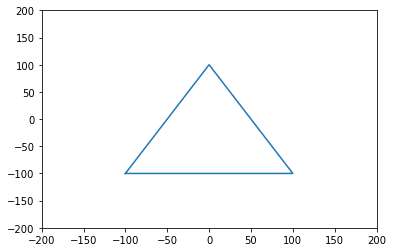

In [16]:
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

При помощи матричных операций выполните:
- Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)


[[ -50. -120.    1.]
 [   0.  120.    1.]
 [  50. -120.    1.]
 [ -50. -120.    1.]]


(-200.0, 200.0)

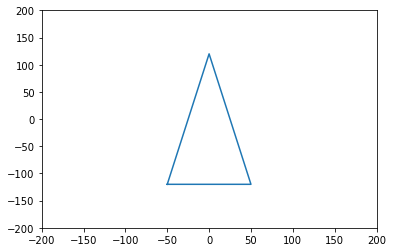

In [26]:
# Масштабирование
scale = np.array([0.5, 1.2, 1])

scale_A = A*scale
print(scale_A)

x = scale_A[:,0]
y = scale_A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 


[[100 200   2]
 [200 400   2]
 [300 200   2]
 [100 200   2]]


(0.0, 400.0)

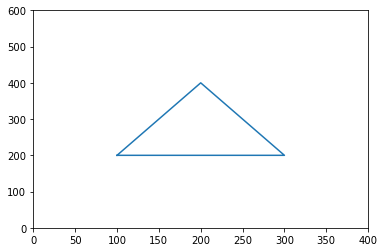

In [34]:
# Смещение
bias = np.array([200, 300, 1])

bias_A = A + bias
print(bias_A)

x = bias_A[:,0]
y = bias_A[:,1]
plt.plot(x, y)
plt.ylim([0, 600])
plt.xlim([0, 400]) 


## Задание 3


Найдите собственные значения и собственные вектора матрицы:

In [36]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [39]:
print('собственные значения')
np.linalg.eig(m)[0]

собственные значения


array([ 3., -1.])

In [40]:
print('собственные векторы')
np.linalg.eig(m)[1]

собственные векторы


array([[ 0.89442719, -0.89442719],
       [ 0.4472136 ,  0.4472136 ]])

## Задание 4


Дана функция с неизвестными параметрами a и b, вам также известны значения функции `fx` в точках `x`. 

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку `error`.


In [41]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [42]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

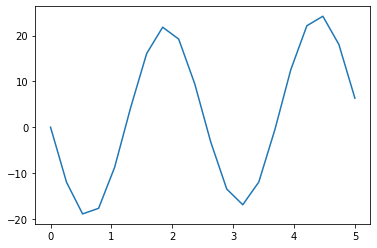

In [43]:
plt.plot(x, fx)
plt.show()

In [47]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

Best parameters: [ 3.  -2.5]
Best SumAbsError: 1.5365207568507344e-06


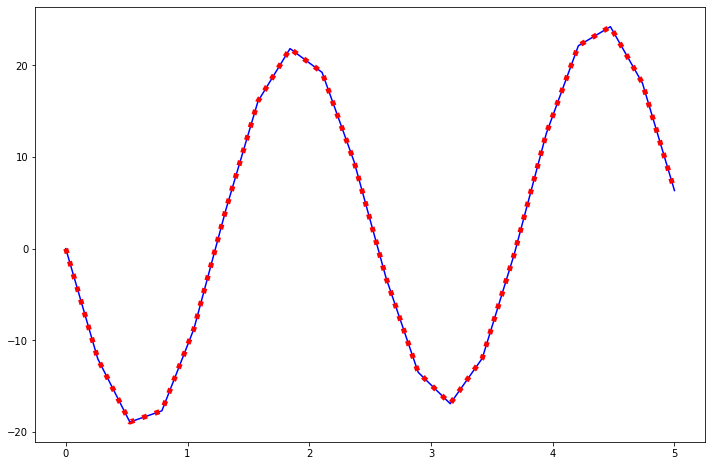

In [70]:
from scipy.optimize import curve_fit

a_range = np.arange(0, 2, 0.1)
b_range = np.arange(0, 2, 0.1)

# Инициализируем переменные для хранения лучших параметров и RMSE
best_params = None
best_sae = float('inf')

# Перебираем параметры и находим модель с наименьшим RMSE
for a in a_range:
    for b in b_range:
        # Вызываем curve_fit для текущих параметров
        params, _ = curve_fit(f, x, fx, [a, b])
        
        # Вычисляем прогнозные значения и SumAbsError
        y_pred = f(x, *params)
        sae = error(params)
        
        # Сохраняем параметры, если SumAbsError меньше текущего лучшего
        if sae < best_sae:
            best_params = params
            best_sae = sae

# Выводим лучшие параметры и RMSE
print('Best parameters:', best_params)
print('Best SumAbsError:', best_sae)

plt.figure(figsize = (12, 8))
plt.plot(x, fx, color='blue')
plt.plot(x, f(x, best_params[0], best_params[1]), color = 'red', linestyle = ':', linewidth = 5)
plt.show()

## Задание 5



Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [4]:
import numpy as np
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [43]:
from scipy.spatial import distance

In [47]:
all_scrore = distance.cdist(raitings, raitings, 'cosine')
for n, current_score in enumerate(all_scrore):
    #чтобы ненайти самого себе - сделаем самовыпиливание
    idx_min_cos = np.delete(current_score, n).argmin()
    # если самовыпил повлиял на стек скора, то скорректируем это
    if n <= min_cos:
        idx_min_cos += 1
    print('x:',n, ' y:',idx_min_cos)

x: 0  y: 8
x: 1  y: 4
x: 2  y: 9
x: 3  y: 8
x: 4  y: 7
x: 5  y: 8
x: 6  y: 3
x: 7  y: 5
x: 8  y: 0
x: 9  y: 2
